In [2]:
import pandas as pd
df = pd.read_csv("Delhi_AQI_2026.csv")

In [4]:
df.head()
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        257 non-null    object 
 1   state          257 non-null    object 
 2   city           257 non-null    object 
 3   station        257 non-null    object 
 4   latitude       257 non-null    float64
 5   longitude      257 non-null    float64
 6   pollutant_id   257 non-null    object 
 7   pollutant_min  252 non-null    float64
 8   pollutant_max  252 non-null    float64
 9   pollutant_avg  252 non-null    float64
dtypes: float64(5), object(5)
memory usage: 20.2+ KB


,0
country,0
state,0
city,0
station,0
latitude,0
longitude,0
pollutant_id,0
pollutant_min,5
pollutant_max,5
pollutant_avg,5


In [5]:
df = df.dropna(subset=['pollutant_avg'])  # or fill with mean/median


In [7]:
import pandas as pd

# Load dataset
df = pd.read_csv("Delhi_AQI_2026.csv")

# Quick look
print(df.shape)
print(df.info())
print(df.head())


(257, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        257 non-null    object 
 1   state          257 non-null    object 
 2   city           257 non-null    object 
 3   station        257 non-null    object 
 4   latitude       257 non-null    float64
 5   longitude      257 non-null    float64
 6   pollutant_id   257 non-null    object 
 7   pollutant_min  252 non-null    float64
 8   pollutant_max  252 non-null    float64
 9   pollutant_avg  252 non-null    float64
dtypes: float64(5), object(5)
memory usage: 20.2+ KB
None
  country  state   city                         station   latitude  longitude  \
0   India  Delhi  Delhi            Bawana, Delhi - DPCC  28.776200  77.051074   
1   India  Delhi  Delhi            Bawana, Delhi - DPCC  28.776200  77.051074   
2   India  Delhi  Delhi            Bawana, Delhi - DPCC 

In [8]:
# Drop rows where pollutant_avg is missing
df = df.dropna(subset=['pollutant_avg'])

# Confirm cleanup
print(df.isnull().sum())


country          0
state            0
city             0
station          0
latitude         0
longitude        0
pollutant_id     0
pollutant_min    0
pollutant_max    0
pollutant_avg    0
dtype: int64


In [9]:
# Function to categorize AQI
def categorize_aqi(value):
    if value <= 50: return "Good"
    elif value <= 100: return "Moderate"
    elif value <= 200: return "Poor"
    else: return "Severe"

df['AQI_Category'] = df['pollutant_avg'].apply(categorize_aqi)

# Check distribution
print(df['AQI_Category'].value_counts())


AQI_Category
Good        118
Poor         60
Moderate     51
Severe       23
Name: count, dtype: int64


In [10]:
# Features: numeric columns
X = df[['latitude', 'longitude', 'pollutant_min', 'pollutant_max']]
y = df['AQI_Category']


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(X_train.shape, X_test.shape)


(201, 4) (51, 4)


In [12]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [13]:
from sklearn.metrics import accuracy_score, f1_score

y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", acc)
print("F1 Score:", f1)


Accuracy: 0.8627450980392157
F1 Score: 0.8614127956541565


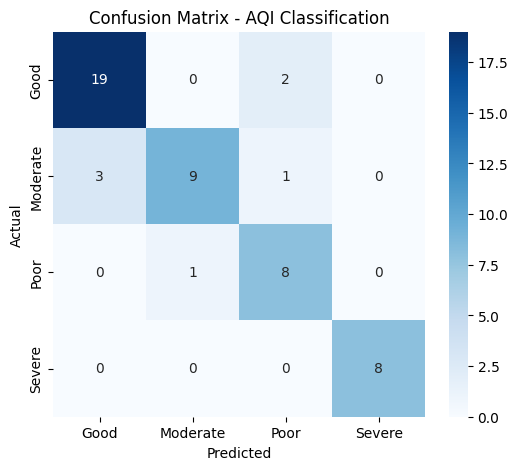

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

# Plot heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_,
            yticklabels=model.classes_)
plt.title("Confusion Matrix - AQI Classification")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


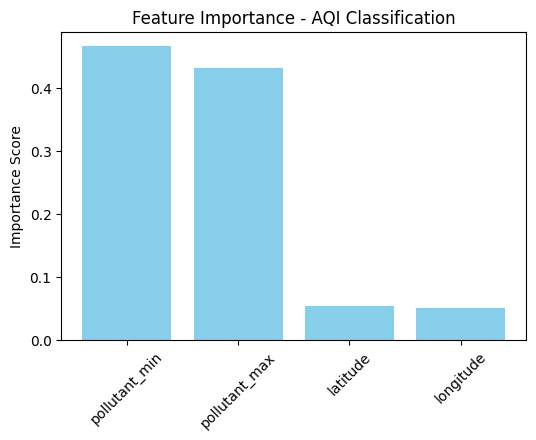

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Get feature importances from the trained RandomForest model
importances = model.feature_importances_
features = X.columns

# Sort by importance
indices = np.argsort(importances)[::-1]

# Plot
plt.figure(figsize=(6,4))
plt.bar(range(len(importances)), importances[indices], align='center', color='skyblue')
plt.xticks(range(len(importances)), [features[i] for i in indices], rotation=45)
plt.title("Feature Importance - AQI Classification")
plt.ylabel("Importance Score")
plt.show()


Mismatches: 7


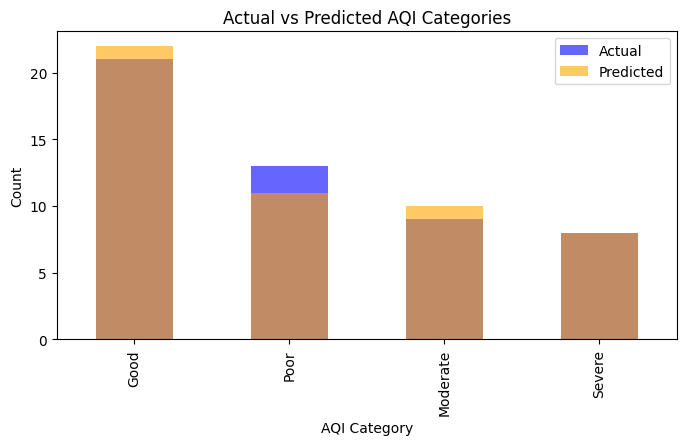

In [16]:
import matplotlib.pyplot as plt

# Example: Compare actual vs predicted AQI categories
comparison_df = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred
})

# Count mismatches
mismatches = (comparison_df["Actual"] != comparison_df["Predicted"]).sum()
print("Mismatches:", mismatches)

# Visualize comparison
plt.figure(figsize=(8,4))
comparison_df["Actual"].value_counts().plot(kind="bar", alpha=0.6, color="blue", label="Actual")
comparison_df["Predicted"].value_counts().plot(kind="bar", alpha=0.6, color="orange", label="Predicted")
plt.title("Actual vs Predicted AQI Categories")
plt.xlabel("AQI Category")
plt.ylabel("Count")
plt.legend()
plt.show()


          Original Predictions  Simulated Predictions
Good                        22                     24
Poor                        11                     18
Moderate                    10                      8
Severe                       8                      1


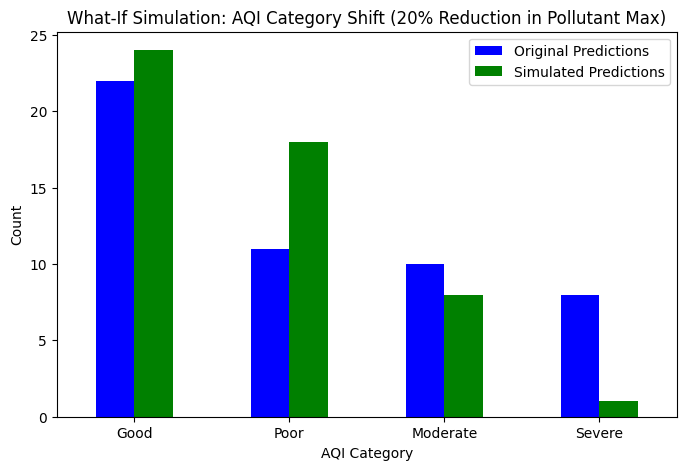

In [17]:
import pandas as pd

# Create a copy of the test set
X_test_sim = X_test.copy()

# Apply intervention: reduce pollutant_max by 20%
X_test_sim['pollutant_max'] = X_test_sim['pollutant_max'] * 0.8

# Predict with the modified data
y_pred_sim = model.predict(X_test_sim)

# Compare distributions
comparison = pd.DataFrame({
    "Original Predictions": pd.Series(y_pred).value_counts(),
    "Simulated Predictions": pd.Series(y_pred_sim).value_counts()
}).fillna(0)

print(comparison)

# Visualize comparison
comparison.plot(kind="bar", figsize=(8,5), color=["blue","green"])
plt.title("What-If Simulation: AQI Category Shift (20% Reduction in Pollutant Max)")
plt.xlabel("AQI Category")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()


In [18]:
# Final evaluation summary
print("=== Final Model Results ===")
print("Accuracy:", acc)
print("F1 Score:", f1)

# Show a few sample predictions vs actual
comparison_df = pd.DataFrame({
    "Actual": y_test[:10].values,
    "Predicted": y_pred[:10]
})
print("\nSample Predictions vs Actual:")
print(comparison_df)


=== Final Model Results ===
Accuracy: 0.8627450980392157
F1 Score: 0.8614127956541565

Sample Predictions vs Actual:
     Actual Predicted
0  Moderate  Moderate
1      Good      Good
2  Moderate  Moderate
3      Good      Good
4  Moderate      Good
5      Poor      Poor
6      Good      Good
7    Severe    Severe
8    Severe    Severe
9      Good      Good
